In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\sanja\OneDrive\Documents\CS_Project\dataset_malwares.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [5]:
dropped_df = df.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

[Text(0, 0, 'Not Malware'),
 Text(1, 0, 'Malware'),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 T

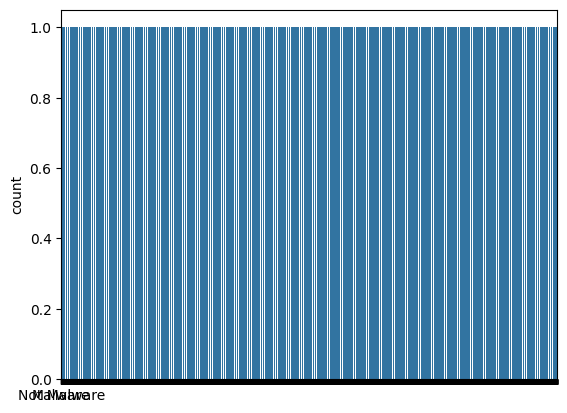

In [6]:
ax=sns.countplot(df['Malware'])
ax.set_xticklabels(['Not Malware', 'Malware'])

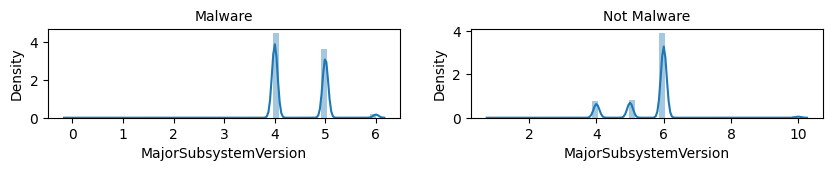

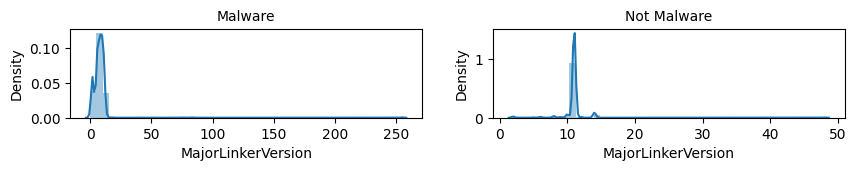

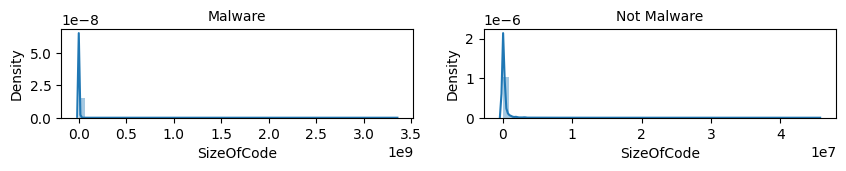

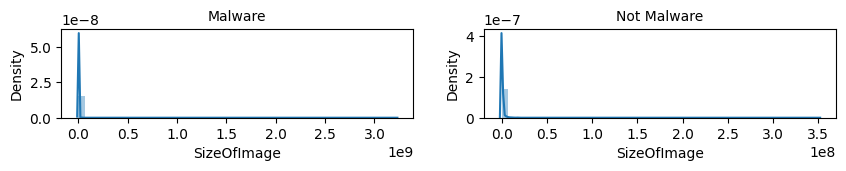

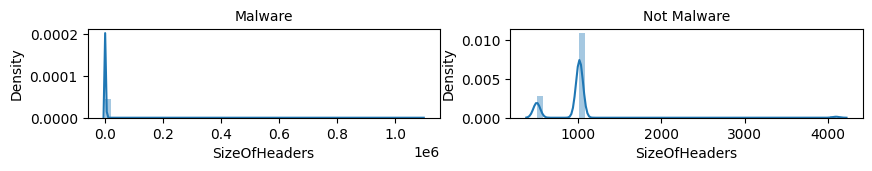

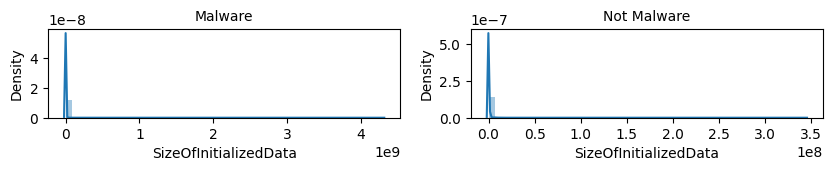

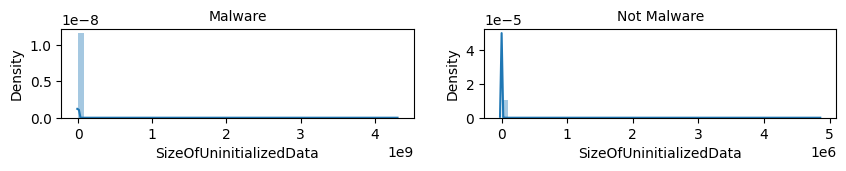

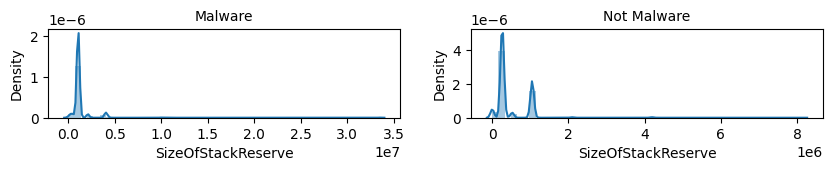

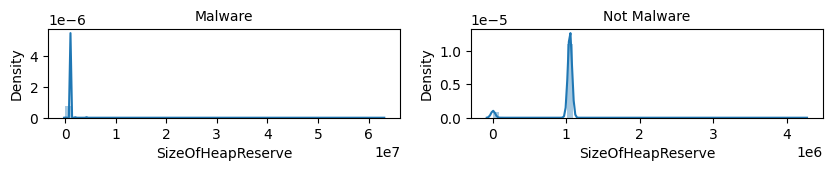

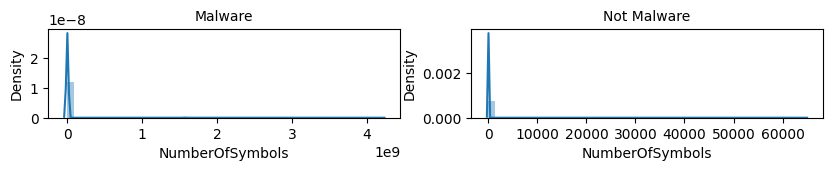

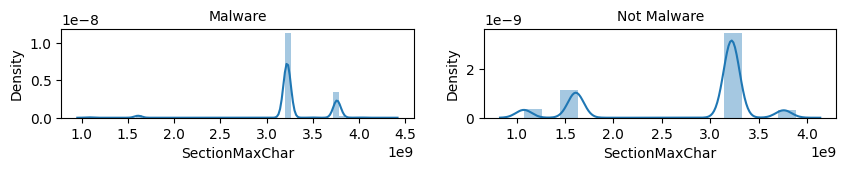

In [7]:
features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData', 
            'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve', 'NumberOfSymbols', 'SectionMaxChar']
i=1

for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(df[df['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(df[df['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Not Malware', fontsize=10)
    i= i+2

In [8]:
X = dropped_df
y = df['Malware']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
print("Number of used features:", X_train.shape[1])

Number of used features: 75


In [10]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(
    # Set the number of trees to 100
    n_estimators=100,
    # Set the random state to 0 to ensure reproducibility
    random_state=0,
    # Enable the out-of-bag (OOB) score
    oob_score = True,
    # Set the maximum depth of the trees to 16
    max_depth = 16)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred, target_names=['Not Malware', 'Malware']))

              precision    recall  f1-score   support

 Not Malware       0.99      0.96      0.98      1003
     Malware       0.99      1.00      0.99      2920

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



Text(50.72222222222221, 0.5, 'True Labels')

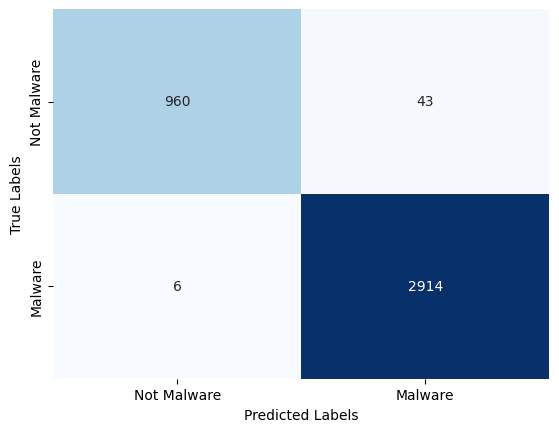

In [13]:
matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=['Not Malware', 'Malware'], yticklabels=['Not Malware', 'Malware'])
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

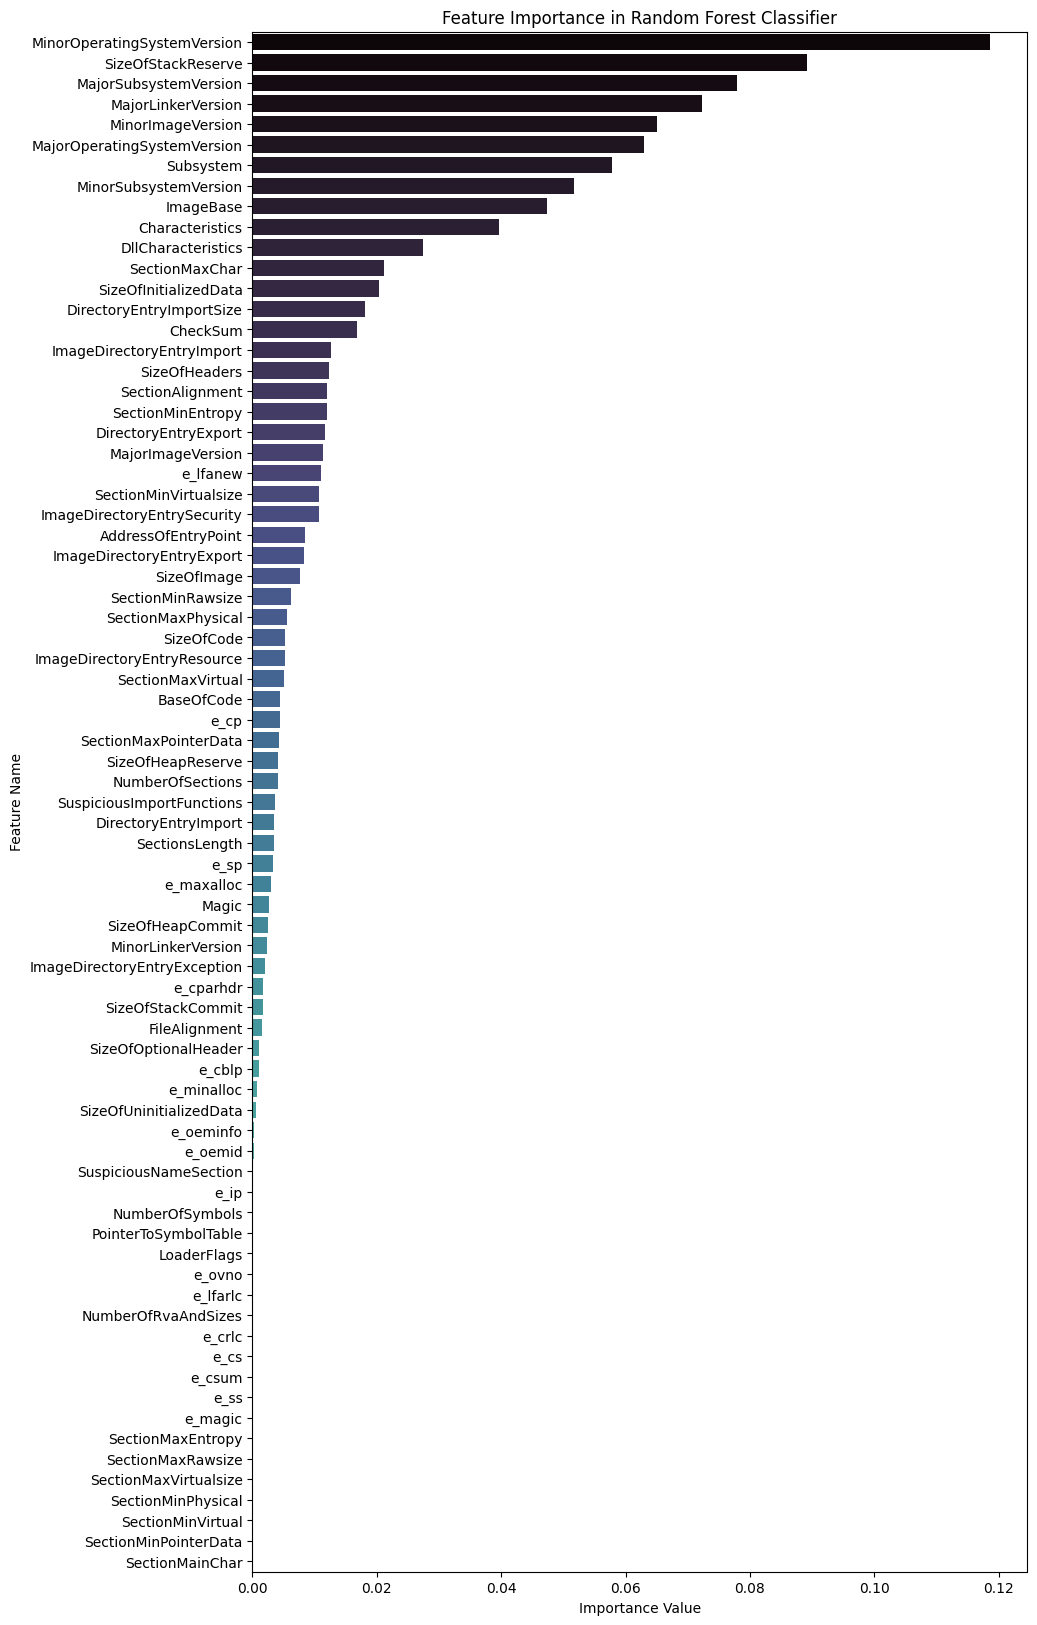

In [14]:
importance = clf.feature_importances_
importance_dict = dict(zip(dropped_df.columns.values, importance))
sorted_importance = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 20))
sns.barplot(x=list(sorted_importance.values()), y=list(sorted_importance.keys()), palette='mako')
plt.xlabel('Importance Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()